# The Sparsifier Class

In this notebook we introduce the `Sparsifier` class and demonstrate its basic functionality

In [4]:
import numpy as np
from Sparsifierpy import SparsifierPy

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fitting the sparsifier

`fit_sparsifier` will apply the transform $HD$ to $X$, draw the `num_feat_comp` indices we will keep for each row of $HDX$, and then discard the data. As an example, we'll generate a dataset $X \in \mathbb{R}^{10 \times 5}$, where each row is a datapoint and there are 5 features. We'll sparsify $X$ into 3 dimensions, so that we are keeping $RHDX \in \mathbb{R}^{10 \times 3}$.

To use the sparsifier we need to specify the number of features of the original space (`num_feat_full`), the number of samples (`num_samp`), and the number of features we wish to keep in the compressed setting (`num_feat_comp`). 

In [6]:
rs = np.random.RandomState(12)
num_samp, num_feat_full = 10, 5
X = rs.rand(num_samp, num_feat_full)
num_feat_comp = 3
sp = SparsifierPy(num_feat_full = num_feat_full, num_feat_comp = num_feat_comp, num_samp = num_samp, random_state = rs, transform = None)
sp.fit_sparsifier(X)

The `mask` attribute indicates which indices are kept for each datapoint:

In [7]:
sp.mask

array([[1, 2, 3],
       [0, 2, 4],
       [0, 2, 4],
       [0, 1, 2],
       [0, 1, 3],
       [0, 3, 4],
       [1, 2, 3],
       [0, 1, 3],
       [1, 2, 3],
       [0, 1, 4]])

The `RHDX` attribute contains the data: 

In [8]:
sp.RHDX

array([[0.7400497 , 0.26331502, 0.53373939],
       [0.91874701, 0.03342143, 0.13720932],
       [0.28382835, 0.94422514, 0.00225923],
       [0.52122603, 0.55203763, 0.48537741],
       [0.76456045, 0.0208098 , 0.11627302],
       [0.67145265, 0.28958678, 0.73312598],
       [0.32756948, 0.33464753, 0.97805808],
       [0.95031352, 0.76747565, 0.4066403 ],
       [0.99513816, 0.17756418, 0.9625969 ],
       [0.42405245, 0.46314887, 0.03516826]])

Since we didn't use a transform in the Sparsifier, `RHDX` is just a subset of `X`. Check this for an arbitrary datapoint:

In [9]:
row = 3
(X[row][sp.mask[row]] == sp.RHDX[row]).all()

True

## Operations on sparsified data

The purpose of sparsifying the data is to permit operations on mixtures of sparse datapoints and dense statistics. Having fit the `Sparsifier` object, we can discard $X$ and use built-in methods to compute things like distances and covariances. We can compute the (approximate) pairwise distances between all the datapoints in the sample, for example:

In [10]:
sp.pairwise_distances()

array([[0.        , 0.51405769, 1.52256132, 0.46005501, 1.31489943,
        0.54594183, 0.78808561, 0.20558673, 0.65363355, 0.61916907],
       [0.51405769, 0.        , 1.44389324, 0.9516921 , 0.34477162,
        1.02013622, 0.67356204, 0.07058488, 0.32231298, 0.79864743],
       [1.52256132, 1.44389324, 0.        , 0.81685202, 1.07494965,
        1.30806994, 1.36305697, 1.49030615, 1.71430602, 0.22773779],
       [0.46005501, 0.9516921 , 0.81685202, 0.        , 0.92387047,
        0.33591693, 0.42750863, 0.75916009, 0.85306369, 0.20823014],
       [1.31489943, 0.34477162, 1.07494965, 0.92387047, 0.        ,
        0.31107364, 1.44635317, 1.06170245, 2.04057582, 0.8826233 ],
       [0.54594183, 1.02013622, 1.30806994, 0.33591693, 0.31107364,
        0.        , 1.53946862, 0.47818646, 1.50489638, 1.17084567],
       [0.78808561, 0.67356204, 1.36305697, 0.42750863, 1.44635317,
        1.53946862, 0.        , 1.14021458, 0.88559036, 0.30316474],
       [0.20558673, 0.07058488, 1.4903061

We can also compute the pairwise distances between the compressed data and a set of dense datapoints, which might be statistics we wish to estimate.

In [11]:
dense_statistics = np.random.rand(4,num_feat_full)
sp.pairwise_distances(dense_statistics) 

array([[0.63342776, 1.10140055, 0.31092141, 0.27617539],
       [0.98299927, 1.38368314, 0.80194395, 0.97240075],
       [0.91346903, 0.929537  , 0.86174022, 1.58679451],
       [0.39270903, 0.72390097, 0.3358996 , 0.70702989],
       [1.24056385, 0.48991548, 0.95675479, 1.35525805],
       [0.72838586, 0.19856542, 0.92564866, 0.54009742],
       [0.68480762, 1.08102001, 0.65851543, 0.88576029],
       [0.59968498, 0.81808527, 0.85074641, 0.38513174],
       [0.77747315, 1.56816167, 0.88332468, 0.43667469],
       [0.76239748, 0.87435411, 0.15674436, 1.33330596]])

The `Sparsifier` class contains several other built-in methods to compute related quantities, including:
- `weighted_means`
- `weighted_means_and_variances`
- `pairwise_mahalanobis_distances`
See the docstrings for more information:

In [12]:
help(sp.pairwise_mahalanobis_distances)

Help on method pairwise_mahalanobis_distances in module Sparsifierpy:

pairwise_mahalanobis_distances(means, covariances, covariance_type) method of Sparsifierpy.SparsifierPy instance
    Compute Mahalanobis distances



## The Johnson-Lindenstrauss Lemma

The Johnson-Lindenstrauss Lemma guarantees the existence of a projection $\Omega: \mathbb{R}^P \to \mathbb{R}^Q$ such that pairwise distances on a fixed number of points are preserved within a low tolerance with high probability. The Sparsifier is a random projection that acts like the JL projections. We will see an example of this here. We will first embed low-dimensional data into a higher dimension with some noise, and then see that as we keep more and more components, the error in the pairwise distances shrinks. 

In [13]:
from scipy.stats import ortho_group
from sklearn.metrics import pairwise_distances, mean_squared_error
original_latent_dimension = 20
embedded_dimension = 100
num_samp = 100
rs = np.random.RandomState(73)
X = rs.rand(num_samp, original_latent_dimension) # generate the low-dimensional data
X = np.concatenate((X, np.zeros([num_samp,embedded_dimension-original_latent_dimension])), axis=1) # embed into higher dimension
X += rs.normal(scale = 0, size = (num_samp, embedded_dimension)) # add noise
X = X[:, rs.permutation(np.arange(0,embedded_dimension,1))] # shuffle columns
true_distances = pairwise_distances(X)

In [14]:
sp = SparsifierPy(num_samp = num_samp, num_feat_full = embedded_dimension, num_feat_comp = 10)
sp.fit_sparsifier(X=X)
HDX = sp.apply_HD(X)

num_feat_comp_array = np.arange(1,original_latent_dimension*3)
mse = np.zeros([3, len(num_feat_comp_array)])
for i, num_feat_comp in enumerate(num_feat_comp_array):
    
    sp1 = SparsifierPy(num_samp = num_samp, num_feat_full = embedded_dimension, num_feat_comp = num_feat_comp)
    sp1.fit_sparsifier(HDX=HDX)
    mse[0,i] = mean_squared_error(true_distances, sp1.pairwise_distances())
    
    sp2 = SparsifierPy(num_samp = num_samp, num_feat_full = embedded_dimension, num_feat_comp = num_feat_comp, num_feat_shared = num_feat_comp//10 + 1)
    sp2.fit_sparsifier(HDX=HDX)
    mse[1,i] = mean_squared_error(true_distances, sp2.pairwise_distances())
    
    sp3 = SparsifierPy(num_samp = num_samp, num_feat_full = embedded_dimension, num_feat_comp = num_feat_comp, num_feat_shared = num_feat_comp)
    sp3.fit_sparsifier(HDX=HDX)
    mse[2,i] = mean_squared_error(true_distances, sp3.pairwise_distances())

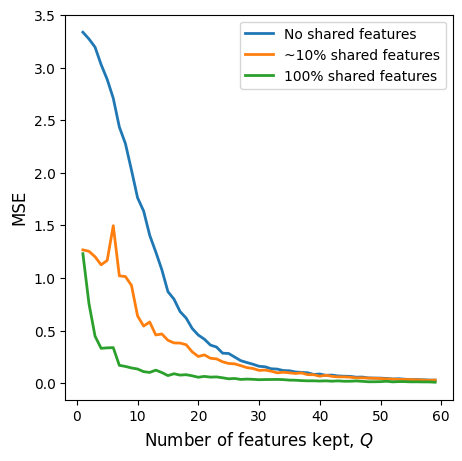

In [15]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(num_feat_comp_array, mse[0], label = 'No shared features', linewidth = 2)
ax.plot(num_feat_comp_array, mse[1], label = '~10% shared features', linewidth = 2)
ax.plot(num_feat_comp_array, mse[2], label = '100% shared features', linewidth = 2)
ax.set_ylabel('MSE', fontsize = 12)
ax.set_xlabel(r'Number of features kept, $Q$', fontsize = 12)
ax.legend()
plt.show()

This plot shows the MSE of the pairwise distances as a function of the number of features we keep out of 100 original features. The fact that we resample the projection $\mathbf{R}_i$ for each datapoint is how the algorithms can be one-pass, but as a consequence we lose accuracy compared to the classical case when computing statitics on two compressed points, because we approximate these statitics using information in the indices shared by both points:

\begin{equation}
||\mathbf{x} - \mathbf{y}||^2 \simeq \sum_{j \in \mathbf{R}_x \cap \mathbf{R}_y} (x_j - y_j)^2
\end{equation}

Under high compression it's likely that $\mathbf{R}_x \cap \mathbf{R}_y = \emptyset$, where we use $\mathbf{R}_x \cap \mathbf{R}_y$ to denote the intersection of features preserved under both projections. Keeping the number of features constant, accuracy increases as the number of these forced to be shared between all datapoints is increased. To mitigate this we can force some number features to be shared across all datapoints. We did so in the above using the `num_feat_shared` parameter when we initialized the sparsifier.

In our algorithms we typically do not need to compute such quantities (in fact, to date the only time we do is during `k-means++` initialization, where we sample a new point with probability proportional to its distance from the current set of initial means). Instead we perform computations like $||\mathbf{R}_i^T \mathbf{x}_i - \mathbf{R}_i^T \boldsymbol{\mu}||$ where $\boldsymbol{\mu}$ is dense. In this case we no longer suffer from the problem described above, since we can use every feature preserved by $\mathbf{R}_i$ rather than an intersection with some other projection.  

We show an example of this below, where we use the same data as above, but compute the pairwise distances between a few dense points and the rest of the sparsified data.


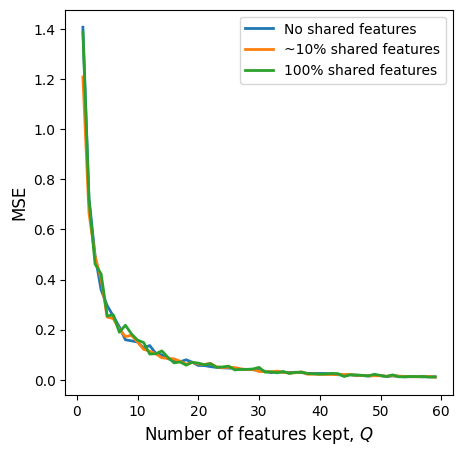

In [16]:
dense_vectors, preconditioned_dense_vectors = X[:10], HDX[:10]
X_new, HDX_new = X[10:], HDX[10:]
true_distances = pairwise_distances(X_new, Y=dense_vectors)
num_samp = X_new.shape[0]
num_feat_comp_array = np.arange(1,original_latent_dimension*3)
mse = np.zeros([3, len(num_feat_comp_array)])
for i, num_feat_comp in enumerate(num_feat_comp_array):
    
    sp1 = SparsifierPy(num_samp = num_samp, num_feat_full = embedded_dimension, num_feat_comp = num_feat_comp)
    sp1.fit_sparsifier(HDX=HDX_new)
    mse[0,i] = mean_squared_error(true_distances, sp1.pairwise_distances(Y=preconditioned_dense_vectors))
    
    sp2 = SparsifierPy(num_samp = num_samp, num_feat_full = embedded_dimension, num_feat_comp = num_feat_comp, num_feat_shared = num_feat_comp//10 + 1)
    sp2.fit_sparsifier(HDX=HDX_new)
    mse[1,i] = mean_squared_error(true_distances, sp2.pairwise_distances(Y=preconditioned_dense_vectors))
    
    sp3 = SparsifierPy(num_samp = num_samp, num_feat_full = embedded_dimension, num_feat_comp = num_feat_comp, num_feat_shared = num_feat_comp)
    sp3.fit_sparsifier(HDX=HDX_new)
    mse[2,i] = mean_squared_error(true_distances, sp3.pairwise_distances(Y=preconditioned_dense_vectors))
    
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(num_feat_comp_array, mse[0], label = 'No shared features', linewidth = 2)
ax.plot(num_feat_comp_array, mse[1], label = '~10% shared features', linewidth = 2)
ax.plot(num_feat_comp_array, mse[2], label = '100% shared features', linewidth = 2)
ax.set_ylabel('MSE', fontsize = 12)
ax.set_xlabel(r'Number of features kept, $Q$', fontsize = 12)
ax.legend()
plt.show()

As expected, there is now no advantage to using more shared features.